In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.applications import VGG16

In [2]:
datagen = ImageDataGenerator(
    rescale=1/255.0
)
dataset_gen = datagen.flow_from_directory(
    'dataset\Object Detection(Ass6)\caltech-101-img',
    batch_size=2000,
    target_size=(64,64),
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [3]:
xtrain,ytrain = dataset_gen[0]
xtest,ytest= dataset_gen[1]

In [4]:
print(len(xtrain))  # Print the number of samples in the first batch of training data
print(len(xtest))

2000
2000


In [5]:
weight = 'dataset/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights=weight,include_top=False,input_shape=(64,64,3))

In [6]:
for layer in base_model.layers:
    layer.trainable=False

In [7]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(102,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 102)               6630      
Total params: 14,852,454
Trainable params: 137,766
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
h1 = model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
63/63 [==============================] - 17s 266ms/step - loss: 3.8474 - accuracy: 0.2070
Epoch 2/10
63/63 [==============================] - 17s 271ms/step - loss: 3.0118 - accuracy: 0.3460
Epoch 3/10
63/63 [==============================] - 17s 267ms/step - loss: 2.6172 - accuracy: 0.4180
Epoch 4/10
63/63 [==============================] - 17s 268ms/step - loss: 2.3368 - accuracy: 0.4565
Epoch 5/10
63/63 [==============================] - 17s 265ms/step - loss: 2.0645 - accuracy: 0.5210
Epoch 6/10
63/63 [==============================] - 17s 266ms/step - loss: 1.8776 - accuracy: 0.5535
Epoch 7/10
63/63 [==============================] - 17s 274ms/step - loss: 1.6985 - accuracy: 0.5875
Epoch 8/10
63/63 [==============================] - 17s 269ms/step - loss: 1.5143 - accuracy: 0.6390
Epoch 9/10
63/63 [==============================] - 17s 270ms/step - loss: 1.4357 - accuracy: 0.6630
Epoch 10/10
63/63 [==============================] - 17s 268ms/step - loss: 1.3134 - accura

In [11]:
for layer in base_model.layers[-2:]:
    layer.trainable=True

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
h2 = model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10


63/63 [==============================] - 19s 307ms/step - loss: 2.4648 - accuracy: 0.4365
Epoch 2/10
63/63 [==============================] - 19s 303ms/step - loss: 1.6670 - accuracy: 0.5765
Epoch 3/10
63/63 [==============================] - 19s 307ms/step - loss: 1.2178 - accuracy: 0.6755
Epoch 4/10
63/63 [==============================] - 19s 302ms/step - loss: 1.0023 - accuracy: 0.7200
Epoch 5/10
63/63 [==============================] - 19s 304ms/step - loss: 0.7419 - accuracy: 0.7955
Epoch 6/10
63/63 [==============================] - 19s 304ms/step - loss: 0.5765 - accuracy: 0.8355
Epoch 7/10
63/63 [==============================] - 20s 322ms/step - loss: 0.4716 - accuracy: 0.8535
Epoch 8/10
63/63 [==============================] - 20s 320ms/step - loss: 0.3795 - accuracy: 0.8835
Epoch 9/10
63/63 [==============================] - 19s 309ms/step - loss: 0.2993 - accuracy: 0.9185
Epoch 10/10
63/63 [==============================] - 21s 329ms/step - loss: 0.2995 - accuracy: 0.9085


In [14]:
testl,testa = model.evaluate(xtest,ytest)

63/63 [==============================] - 18s 289ms/step - loss: 2.2493 - accuracy: 0.6065


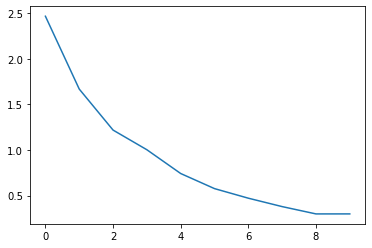

In [15]:
import matplotlib.pyplot as plt
plt.plot(h2.history['loss'])

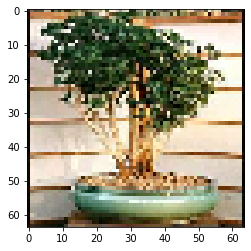

In [16]:
plt.imshow(xtest[30])

In [17]:
labels = list(dataset_gen.class_indices.keys())
print('predicted: ',labels[np.argmax(model.predict(xtest)[30])])
print('actual',labels[np.argmax(ytest[30])])

predicted:  bonsai
actual bonsai
